In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import copy
sys.path.insert(1, '../')
import util

In [10]:
def plotHist(img):
    L = util.calcNivelesGrises(img)
    values = L*[0]
    for x in range(len(img)):
        for y in range(len(img[0])):
            values[img[x][y]]+=1

    plt.hist(values, len(values))
    plt.show()
    

In [71]:
imgToTest = mpimg.imread('../img/aerial.jpg')

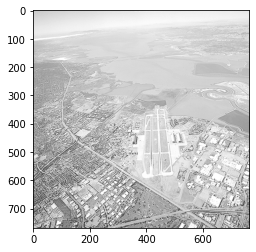

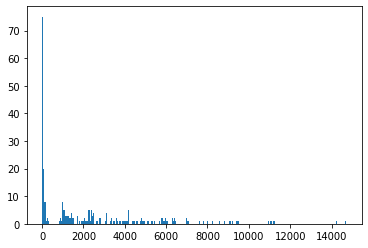

In [72]:
plt.imshow(imgToTest, cmap='gray')
plt.show()
plotHist(imgToTest)

# Ejercicio 4

In [86]:
def f2(v1X,v1Y,v2X,v2Y,v):
    pte = abs((v1Y-v2Y)/(v1X-v2X))
    b = v1Y - pte * v1X
    return pte * v + b

def f(v, L):
    r1, r2 = L/4, L*3/4
    s1, s2 = r1/2, r2
    f1, f3 = lambda v: v/2, lambda v: v*2
    #Tenemos que calcular las pendientes
    if v < r1:
        return f1(v)
    elif v < r2:
        return f2(r1, f1(r1), r2, f3(r2), v)
    else: 
        return f3(v)
    
def aumentoContraste(img):
    L = util.calcNivelesGrises(img)
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = int(f(img[x][y],L))
    return imgCopy

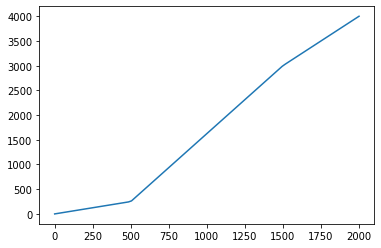

In [87]:
x = np.linspace(0,2000,100)
y = list(map(lambda z : f(z,2000), x))
plt.plot(x,y)
plt.show()

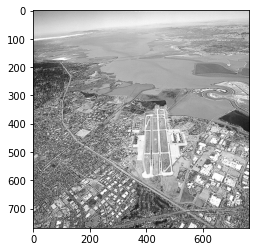

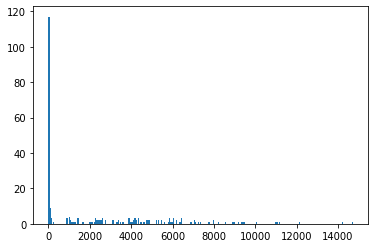

In [88]:
img2 = aumentoContraste(imgToTest)
plt.imshow(img2, cmap='gray')
plt.show()
plotHist(img2)